In [237]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets

In [238]:
COLOR = 'yellow'

def set_spines(ax): 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.spines['bottom'].set_color(COLOR)
    ax.spines['left'].set_color(COLOR)

    # Make ticks and tick labels red for both x and y axes
    ax.tick_params(axis='x', colors=COLOR)  # X-axis ticks and labels
    ax.tick_params(axis='y', colors=COLOR)  # Y-axis ticks and labels
    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False,
               labelbottom=False, labelleft=False)


In [239]:
def load_diabetes():
    x_columns = {'bp': 'bloodPressure', 
                 'bmi': 'bodyMassIndex',
                 's1': 'totalSerumCholesterol', 
                 's2': 'lowDensityLipoproteins',
                 's3': 'highDensityLipoproteins',
                 's4': 'totalCholesterol',
                 's5': 'serumTriglyceridesLevel',
                 's6': 'bloodSugarLevel'}
    x, y = datasets.load_diabetes(return_X_y=True, as_frame=True)
    x = x.rename(columns=x_columns)
    y = pd.DataFrame({'diseaseProgression': y})
    return x, y

### Activation functions

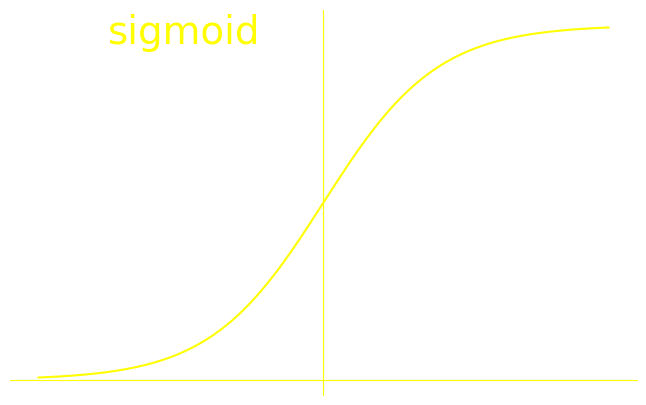

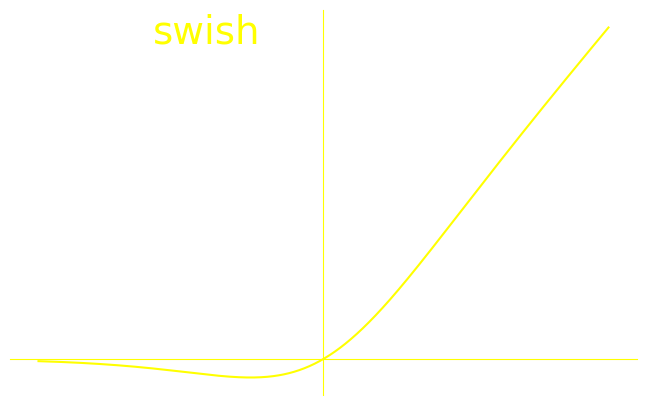

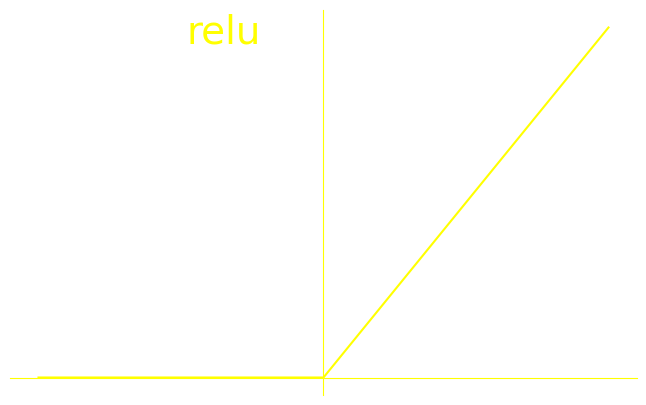

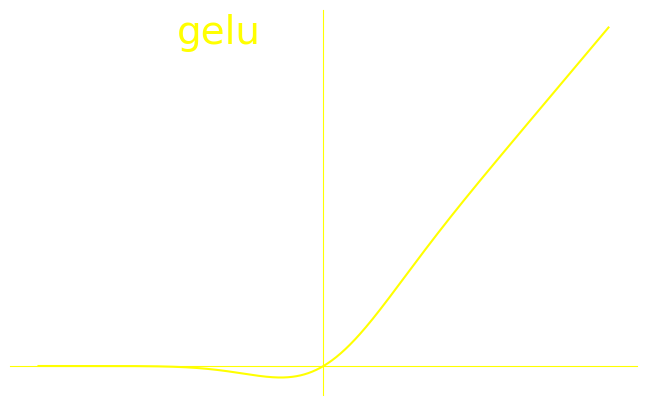

In [240]:
import numpy as np 
from scipy.special import erf

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x) )

def swish(x):
    return x * sigmoid(x)

def gelu(x):
    return 0.5 * x * (1 + erf(x / np.sqrt(2)))

def plot_activation(x, y, name=None):
    fig, ax = plt.subplots(figsize=(5 * 1.618, 5))
    set_spines(ax)
    ax.spines['left'].set_position('zero')  # Set the y-axis spine at x=0
    ax.spines['bottom'].set_position('zero') # Set the x-axis spine at y=0
    ax.plot(x, y, color=COLOR)
    if name:
        ax.text(
        0.4, 0.99,  # Relative coordinates: (x, y) in axes fraction
        name,
        color=COLOR,
        transform=ax.transAxes,  # Use axis fraction coordinates
        fontsize=28,  # Text font size
        verticalalignment='top',  # Align text vertically to the top
        horizontalalignment='right'  # Align text horizontally to the left
        )
        plt.savefig(f"../slides/neural_networks/assets/{name}_activation.svg", format="svg", bbox_inches='tight', transparent=True)
        
    

xs = np.linspace(-5, 5, 1000)
plot_activation(xs, sigmoid(xs), name='sigmoid')
plot_activation(xs, swish(xs), name='swish')
plot_activation(xs, relu(xs), name='relu')
plot_activation(xs, gelu(xs), name='gelu')


### Linear Regression

Intercept 152.13348416289617, Coefficient 949.4352603840388 


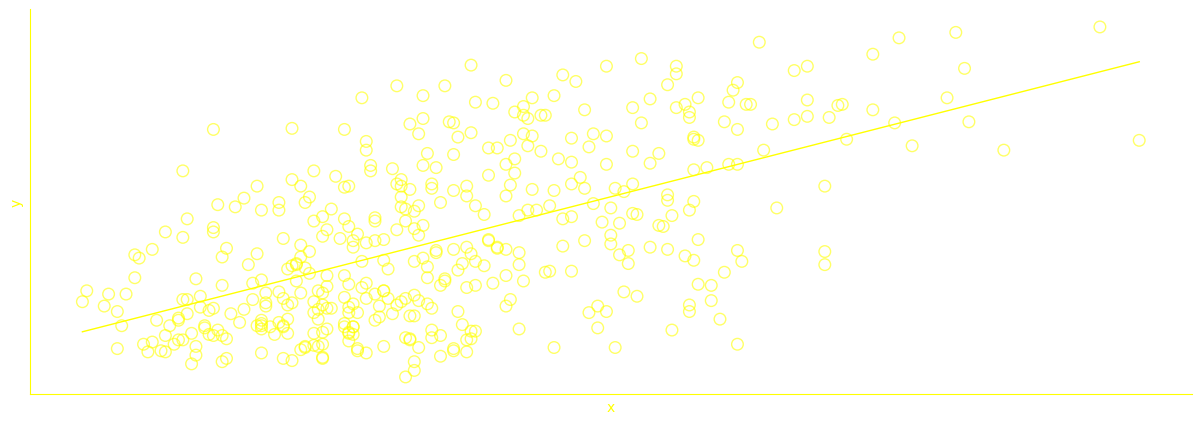

In [241]:
from sklearn.linear_model import LinearRegression

x, y = load_diabetes()

# Todo test train split
x_train, y_train = x, y
x_test, y_test = x, y


regr = LinearRegression()
regr.fit(x_train[['bodyMassIndex']], y_train)
print(f"Intercept {regr.intercept_[0]}, Coefficient {regr.coef_[0,0]} ")
x_pred = x_test[['bodyMassIndex']].sort_values(by='bodyMassIndex')
y_pred = regr.predict(x_pred)
    
def plot_linear_regression():
    fig, ax = plt.subplots(figsize=(15,5))
    ax.scatter(x_train.bodyMassIndex, y, color=COLOR, alpha=.6, facecolor='none', label='data',s=70)
    ax.plot(x_pred, y_pred, '-',  color=COLOR, label = 'linear fit', lw=1)
    ax.set_xlabel('x', color=COLOR)
    ax.set_ylabel('y', color=COLOR)
    set_spines(ax)
    #ax.legend()
    plt.savefig("../slides/neural_networks/assets/linear_regression.svg", format="svg", bbox_inches='tight', transparent=True)
    

plot_linear_regression()

### 1-D Optimizer

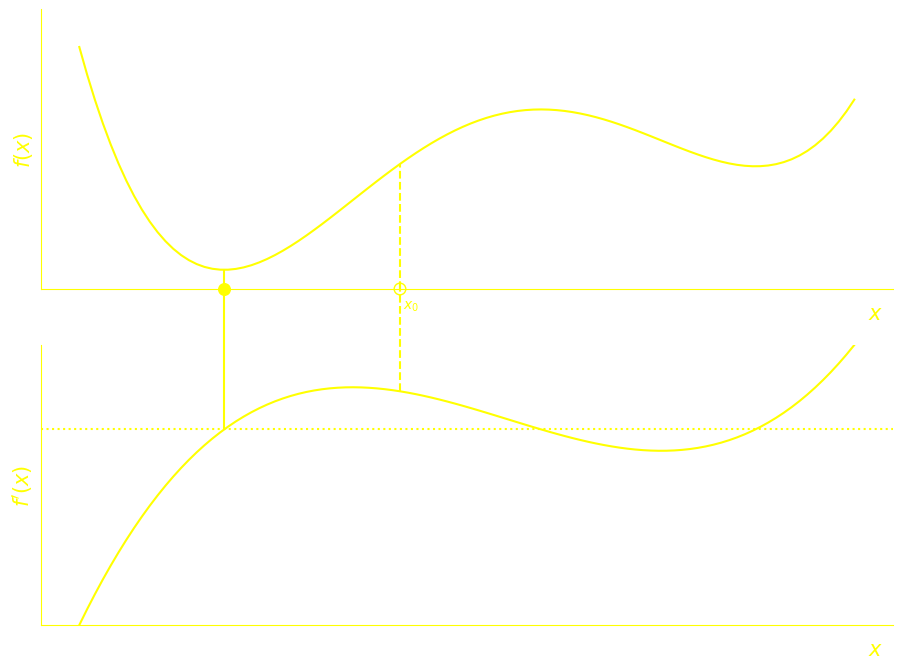

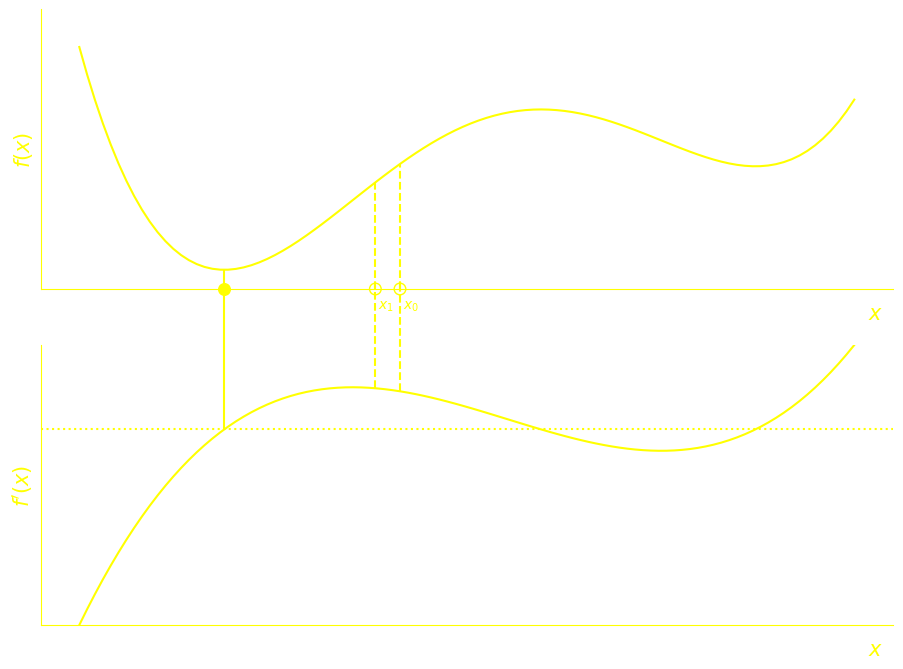

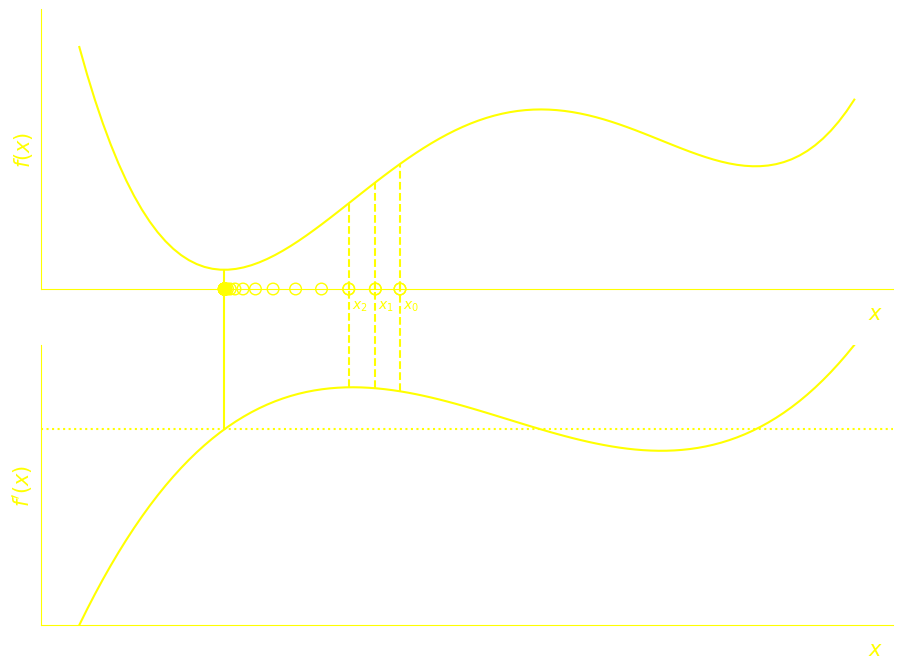

In [236]:
# Rewriting the code after environment reset

import numpy as np

# Objective function
def objective_function(x):
    return (x-1)**2 * (x + 1)**2  + .5*x  

# Gradient (derivative) of the objective function
def gradient(x):
    return 4 * x * (x+1) * (x-1) + .5

# Implementing gradient descent with constant step size (line width)
def gradient_descent(func, grad, initial_x, step_size, max_iters=100, tol=1e-6):
    x = initial_x
    x_history = [x]
    
    for i in range(max_iters):
        grad_value = grad(x)
        # Update x by moving in the negative gradient direction
        x_new = x - step_size * grad_value
        # Store the new x value
        x_history.append(x_new)
        # Stop if the change in x is smaller than the tolerance
        delta = np.linalg.norm(x_new - x)
        if delta < tol:
            break
        x = x_new
    return x, np.array(x_history)



# Run gradient descent



def plot_opt(optimum, history, optimization_steps:int=None, add_all_steps=False, path=None):
    fig, axs = plt.subplots(2, figsize=(11,8), sharex=False)
    ax = axs[0]
    set_spines(ax)
    ax.set_ylabel('$f(x)$', color=COLOR, fontsize=15)
    ax.set_xlabel('$x$', color=COLOR, fontsize=15)
    ax.xaxis.set_label_coords(.98, -0.05)
    
    # plot function
    xs = np.linspace(-1.6, 1.3, 100)
    ax.plot(xs, objective_function(xs), color=COLOR)
    zero_line = -.7
    ax.set_ylim(zero_line, 2)
    #plot goal
    ax.scatter(optimum, zero_line, color=COLOR, s=70, clip_on=False)    
    ax.vlines(optimum, ymin=zero_line, ymax=objective_function(final_x), colors=COLOR)

    # plot optimization steps
    if optimization_steps:
        if optimization_steps == 'all':
            x = history
        else:
            x = history[:optimization_steps]
        ax.scatter(x, (np.ones_like(x) * zero_line), color=COLOR, facecolor='none', s=70, clip_on=False)    
        ax.vlines(x, ymin=zero_line, ymax=objective_function(x), colors=COLOR, linestyles='dashed', label='vline')

        # Set the custom ticks and labels
        ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False,
               labelbottom=True, labelleft=False)
        ax.set_xticks(x+ .04)
        ax.set_xticklabels([f'$x_{s}$' for s in range(len(x))])
        
    if add_all_steps: 
        ax.scatter(history, (np.ones_like(history) * zero_line), color=COLOR, facecolor='none', s=70, clip_on=False)    
        
    

    axs[1].set_ylabel("$f'(x)$", color=COLOR, fontsize=15)
    axs[1].set_xlabel("$x$", color=COLOR, fontsize=15)
    axs[1].xaxis.set_label_coords(.98, -0.05)
    grads = gradient(xs)
    axs[1].plot(xs, grads, color=COLOR)
    axs[1].axhline(0, color=COLOR, ls=":")
    # at opt
    axs[1].vlines(optimum, ymin=gradient(optimum), ymax=grads.max()+3, colors=COLOR, clip_on=False)
    if optimization_steps:
        axs[1].vlines(x, ymin=gradient(x), ymax=grads.max()+3, colors=COLOR, linestyles='dashed', label='vline', clip_on=False)
    axs[1].set_ylim(grads.min(), grads.max())
    
    set_spines(axs[1])
    if path: 
        plt.savefig(f"../slides/neural_networks/assets/{path}", format="svg", bbox_inches='tight', transparent=True)
        
final_x, x_history = gradient_descent(objective_function, gradient, -.4, 0.05, max_iters=100)
plot_opt(final_x, x_history, 1, path='1-d-optimizer_step_0.svg')
plot_opt(final_x, x_history, 2, path='1-d-optimizer_step_1.svg')
plot_opt(final_x, x_history, 3,  add_all_steps=True, path='1-d-optimizer_step_all.svg')



### 2-d optimizer

In [27]:
def add_intercept(x):
    return x.assign(intercept = 1)

def loss(alpha):
    alpha = np.array(alpha).reshape(-1, 1)  # Ensure alpha is a column vector
    #loss = x_mat @ alpha - y_mat
    #loss = l.T @ l
    #loss = l[0, 0]
    y_pred = x_mat @ alpha
    loss = (1 / (2 * len(y))) * np.sum((y_pred - y_mat) ** 2)
    return  loss


def gradient(alpha):
    #p1 =  alpha.transpose() @ x_mat.transpose() @ x_mat
    #p2 = y_mat.transpose() @ x_mat
    #gradient = 2 * p1  - 2 * p2 
    #return gradient
    return (1 / len(y_mat)) * (x_mat.T @ (x_mat @ alpha - y_mat))


In [28]:
from sklearn.linear_model import LinearRegression
import numpy as np
x_mat = add_intercept(x)[['intercept', 'bodyMassIndex']].values
y_mat = y.values

regr = LinearRegression()
regr.fit(x[['bodyMassIndex']].values, y_mat)
minimum = np.array([[regr.intercept_[0]], [regr.coef_[0,0]]])



print(minimum)

#alpha_zero = np.zeros((2,1))
alpha_zero = np.array([[105], [1000]])
loss(alpha_zero)
#print(f"gradient at alpha_zero {alpha_zero}:  {gradient(alpha_zero)}, loss: {loss(alpha_zero)}" )
#print(f"gradient at min {minimum}:  {gradient(minimum)}, loss: {loss(minimum)}" )

alpha, hist = gradient_descent(func=loss, grad=gradient, initial_x=alpha_zero, step_size=.35, max_iters=100000)
alpha

[[152.13348416]
 [949.43526038]]


array([[152.13348416],
       [949.43652324]])

In [29]:
len(hist)

13380

In [229]:

from mpl_toolkits.mplot3d import Axes3D


def plot_2d_contour(minimum,
                    history, 
                    path,
                    optimization_steps:int=None,
                    alpha1_vals=np.linspace(100, 200, 100), 
                    alpha2_vals=np.linspace(0, 2000, 100), 
                    ):
    # Create a meshgrid for alpha1 and alpha2 values
    alpha1, alpha2 = np.meshgrid(alpha1_vals, alpha2_vals)
    
    # Calculate the loss values for each (alpha1, alpha2) pair
    loss_vals = np.array([[loss([a1, a2]) for a1, a2 in zip(row_alpha1, row_alpha2)]
                          for row_alpha1, row_alpha2 in zip(alpha1, alpha2)])

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 10))
    set_spines(ax)
    

    # Plot the contour plot
    contour_levels = np.linspace(loss_vals.min() * .65, loss_vals.max()*.65, 30)
    contour = ax.contour(alpha1, alpha2, loss_vals, levels=contour_levels, colors=COLOR, linewidths=.5)
    # optimum
    ax.scatter(minimum[0], minimum[1], color=COLOR, facecolor=COLOR, s=100)
    
    if optimization_steps:
        steps = min(3, optimization_steps)
        for step in range(steps):
            ax.scatter(history[step][0], history[step][1],  color=COLOR, facecolor='none', s=100)
        if optimization_steps > 3:
            for step in range(steps, optimization_steps):
                ax.scatter(history[step][0], history[step][1],  color=COLOR, facecolor='none', s=20)
            
        

        arrow_steps = min(optimization_steps - 1, 2)
        for step in range(arrow_steps):
            delta = history[step+1] - history[step]
            delta = (1 - 1/np.linalg.norm(delta)) * delta
            ax.arrow(history[step][0,0], 
                     history[step][1,0],
                     delta[0,0],
                     delta[1,0],
                     width=3,
                     head_width=30, 
                     head_length=1, 
                     length_includes_head=True,
                     overhang=.8, 
                     fc=COLOR, 
                     ec=COLOR)
    # Set axis labels
    ax.set_xlabel('x', color=COLOR, fontsize=15)
    ax.set_ylabel('y', color=COLOR, fontsize=15)

    # Remove axis ticks
    ax.set_xticks([])  # Remove x ticks
    ax.set_yticks([])  # Remove y ticks

    # Set the background color to transparent
    ax.set_facecolor('none')

    # ave the plot as an SVG
    if path:
        plt.savefig(f"../slides/neural_networks/assets/{path}.svg", format="svg", bbox_inches='tight', transparent=True)
    
    # Show the plot
    plt.show()

In [230]:
from matplotlib.patches import FancyArrowPatch


def plot_3d(minimum, 
            history, 
            path,
            optimization_steps:int=None,
            alpha1_vals=np.linspace(100, 200, 100), 
            alpha2_vals=np.linspace(0, 2000, 100)):
    
    alpha1, alpha2 = np.meshgrid(alpha1_vals, alpha2_vals)
    loss_vals = np.array([[loss([a1, a2]) for a1, a2 in zip(row_alpha1, row_alpha2)]
                      for row_alpha1, row_alpha2 in zip(alpha1, alpha2)])

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    if optimization_steps:
        steps = min(3, optimization_steps)
        for step in range(steps):
            ax.scatter(history[step][0], history[step][1], loss(history[step]),  color=COLOR, facecolor='none', s=50)
        if optimization_steps > 3:
            for step in range(steps, optimization_steps):
                ax.scatter(history[step][0], history[step][1], loss(history[step]),  color=COLOR, facecolor='none', s=15)
        
        
        arrow_steps = min(optimization_steps - 1, 2)
        for step in range(arrow_steps):
            # Compute scalar loss values
            loss_value_step = float(loss(history[step]))
            loss_value_step_next = float(loss(history[step + 1]))
            start = np.array([history[step][0,0], history[step][1,0], loss_value_step])
            end = np.array([history[step + 1][0,0], history[step + 1][1,0], loss_value_step_next])
            
            # Calculate arrow direction
            direction = end - start

            # Add arrow using quiver
            ax.quiver(
                start[0], start[1], start[2],  # Start point
                direction[0], direction[1], direction[2],  # Direction vector
                color=COLOR, arrow_length_ratio=0., linewidth=1.5
            )   
             
   
    ax.scatter(minimum[0], minimum[1], loss(np.array(minimum)), color=COLOR, facecolor=COLOR, s=50)
    ax.plot_wireframe(alpha1, alpha2, loss_vals, color=COLOR, lw=.3, rstride=3, cstride=3)
    

    ax.set_xlabel('$x$', color=COLOR, labelpad=-10)
    ax.set_ylabel('$y$', color=COLOR, labelpad=-10)
    ax.set_zlabel('$f(x,y)$', color=COLOR, labelpad=-10)
    ax.set_xticks([])  # Remove x ticks
    ax.set_yticks([])  # Remove y ticks
    ax.set_zticks([])  # Remove z ticks
    # Set the gray background (box) to transparent
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    # Remove the pane edges
    ax.xaxis.pane.set_edgecolor('none')  # Transparent edge for x-axis
    ax.yaxis.pane.set_edgecolor('none')  # Transparent edge for y-axis
    ax.zaxis.pane.set_edgecolor('none')  # Transparent edge for z-axis
    ax.xaxis.line.set_color(COLOR)
    ax.yaxis.line.set_color(COLOR)
    ax.zaxis.line.set_color(COLOR)

    # Set viewing angle
    ax.grid(False)
    #ax.view_init(elev=20, azim=-120)
    if path:
        plt.savefig(f"../slides/neural_networks/assets/{path}.svg", format="svg", bbox_inches='tight', transparent=True)
    plt.show()

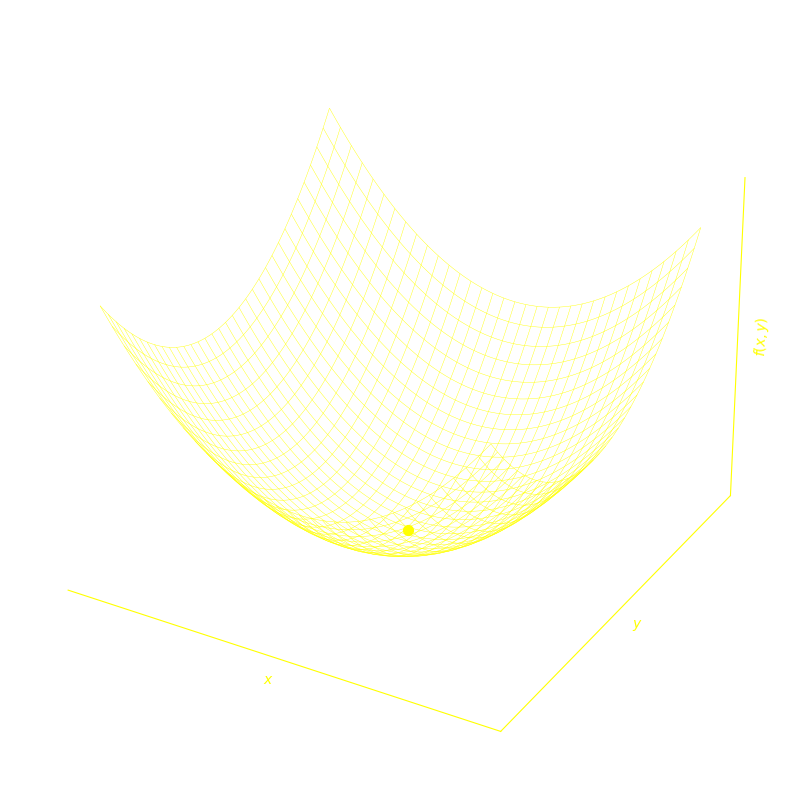

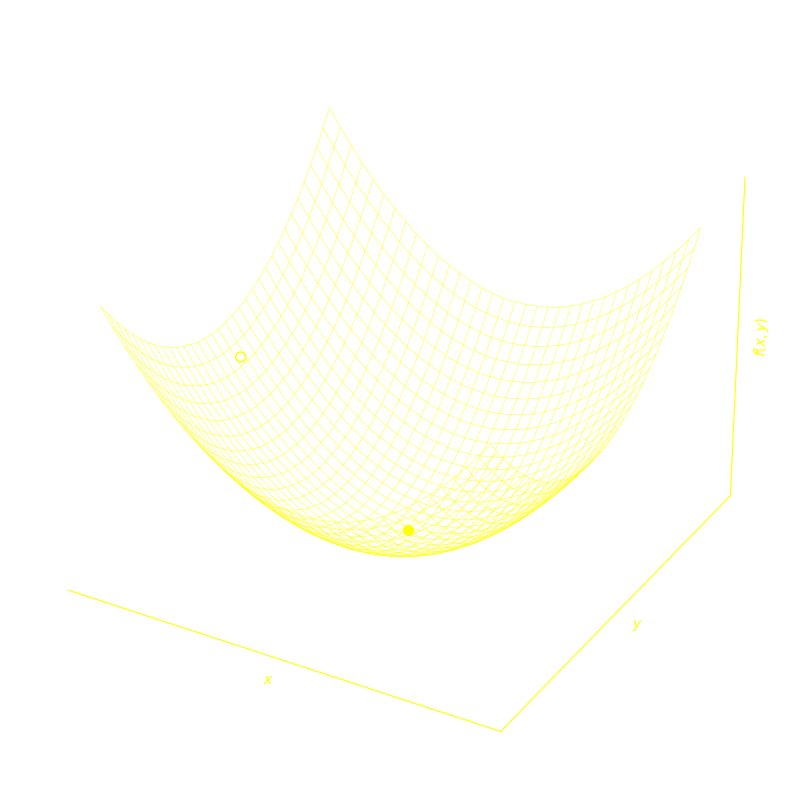

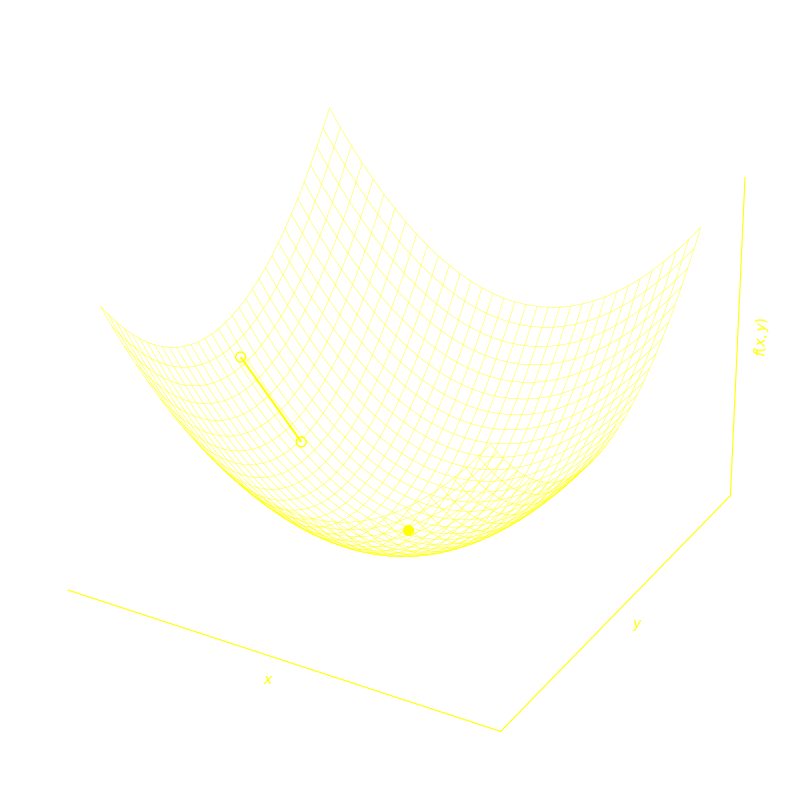

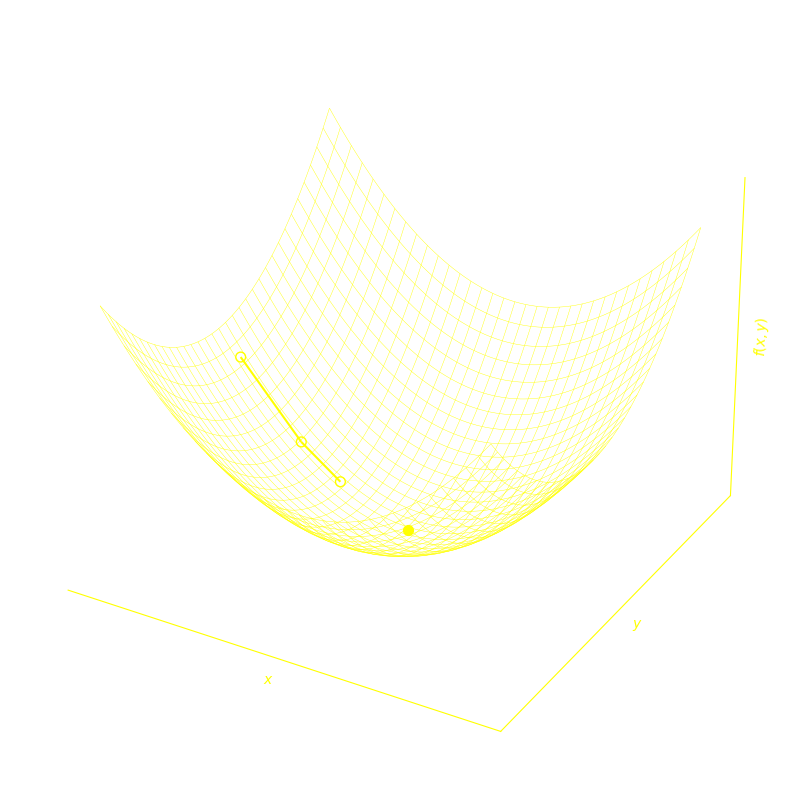

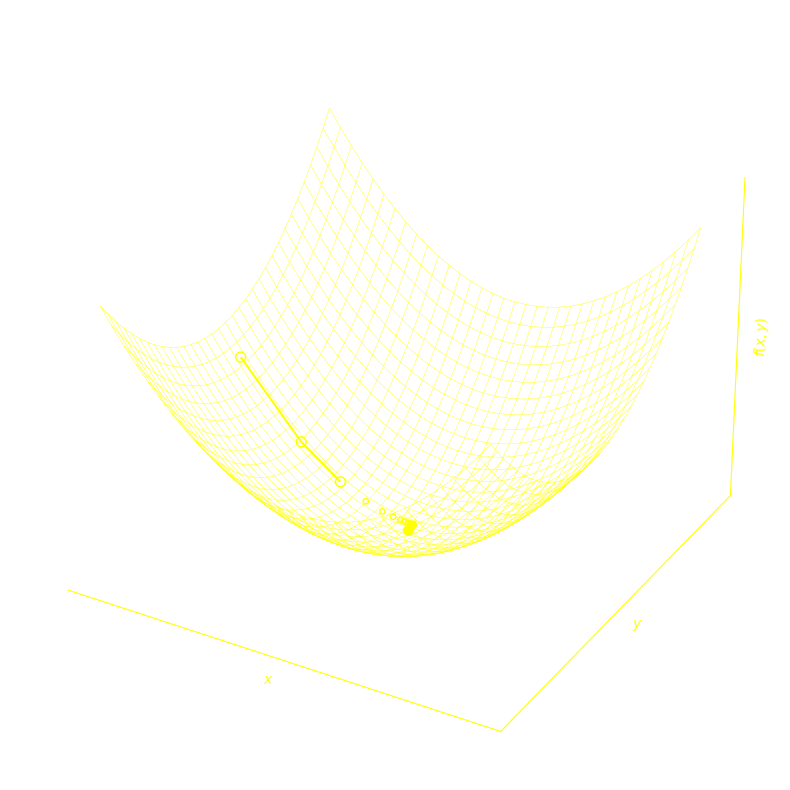

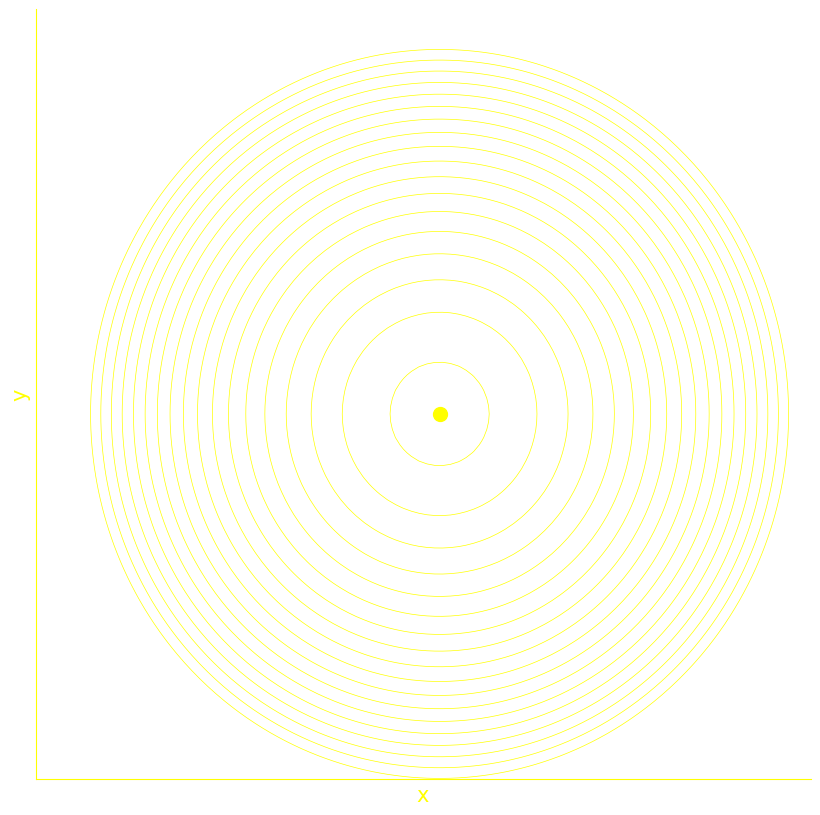

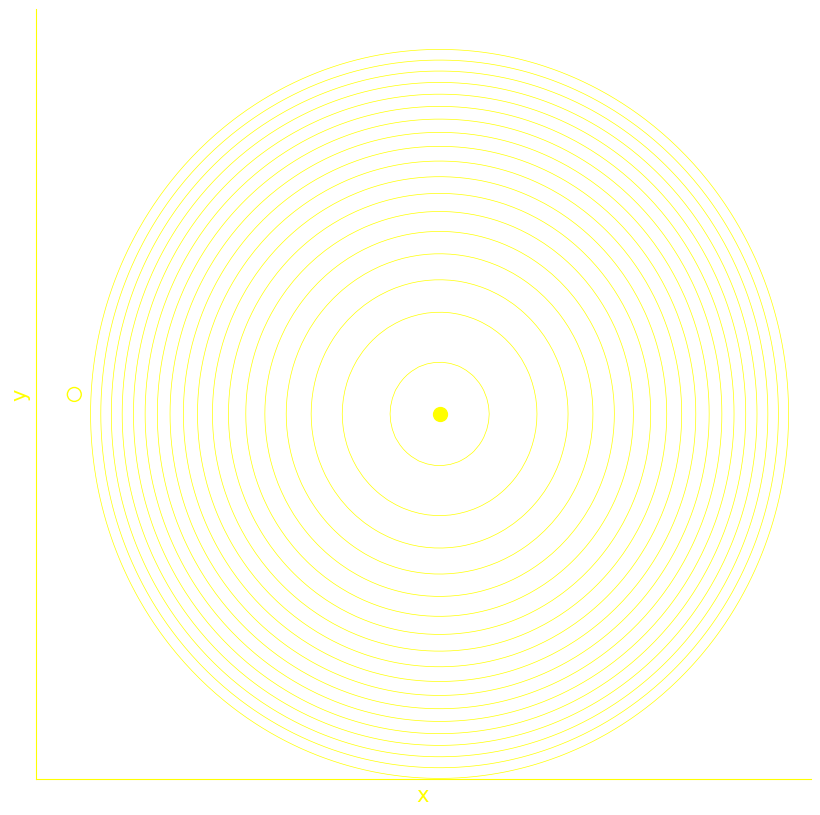

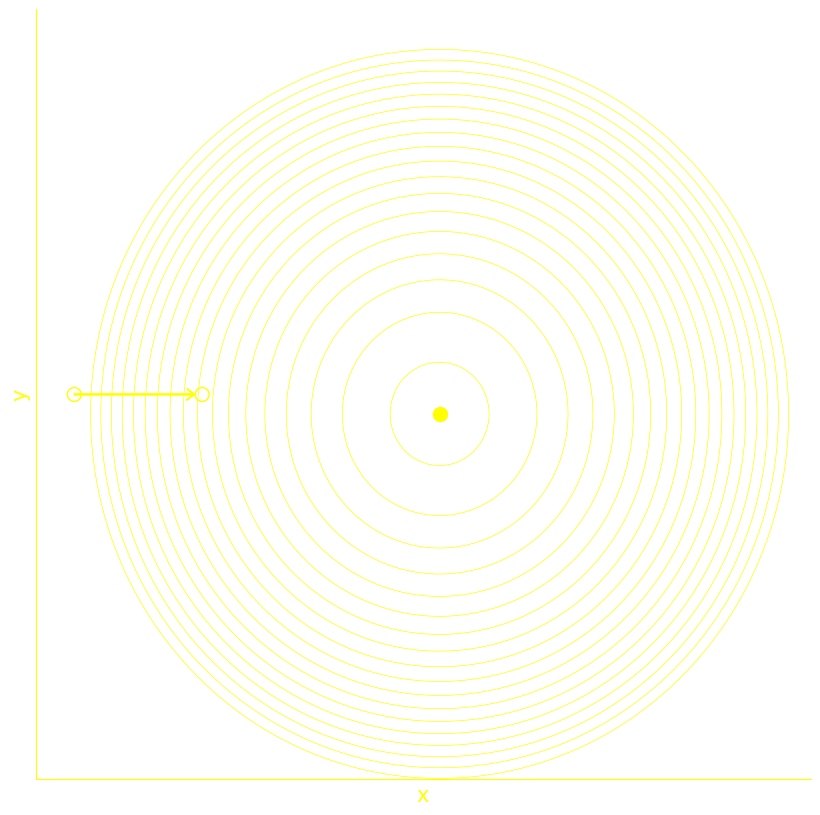

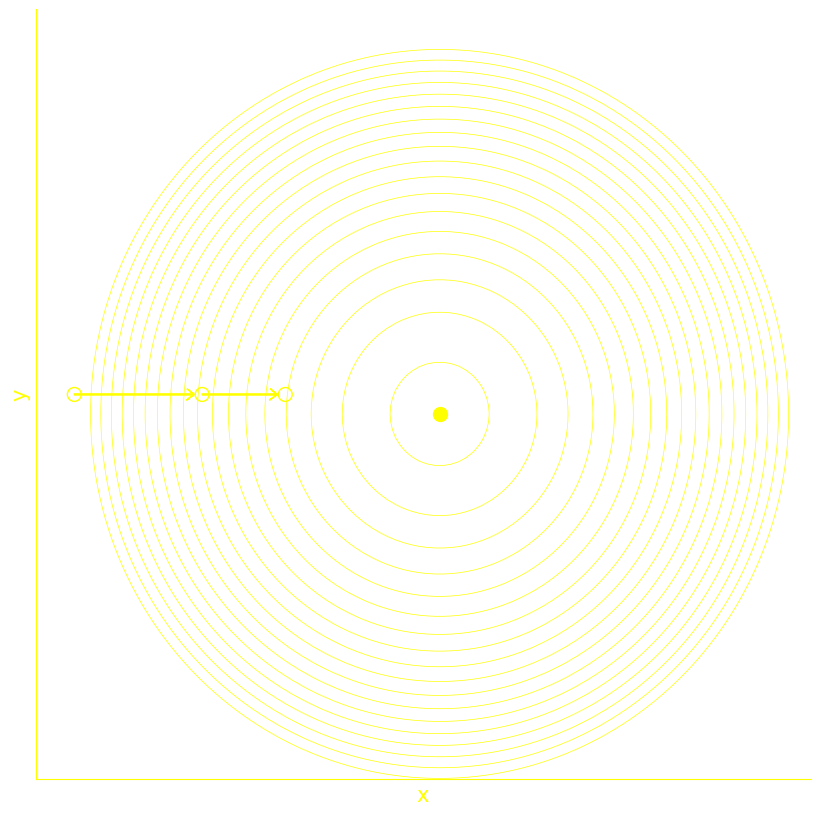

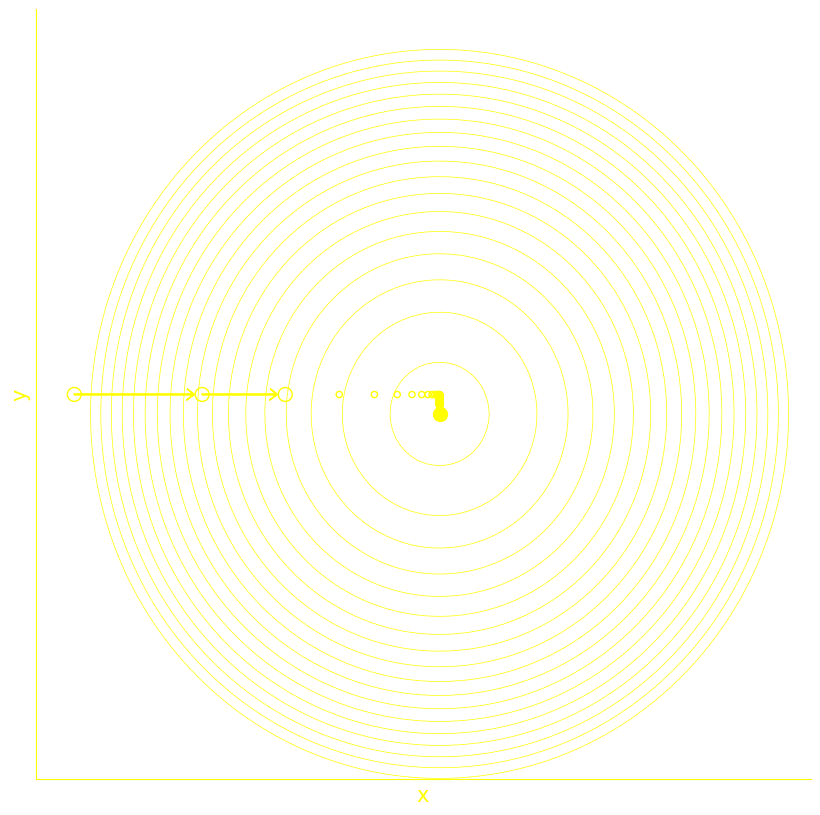

In [233]:
# Example usage of the function:
COLOR='yellow'
plot_3d(minimum=minimum, history=hist, path='optimizer_3d', optimization_steps=None)
plot_3d(minimum=minimum, history=hist, path='optimizer_3d_step_1', optimization_steps=1)
plot_3d(minimum=minimum, history=hist, path='optimizer_3d_step_2', optimization_steps=2)
plot_3d(minimum=minimum, history=hist, path='optimizer_3d_step_3', optimization_steps=3)
plot_3d(minimum=minimum, history=hist, path='optimizer_3d_final', optimization_steps=1000)

plot_2d_contour(minimum=minimum, history=hist, path='optimizer_contour', optimization_steps=None)
plot_2d_contour(minimum=minimum, history=hist, path='optimizer_contour_step_1', optimization_steps=1)
plot_2d_contour(minimum=minimum, history=hist, path='optimizer_contour_step_2', optimization_steps=2)
plot_2d_contour(minimum=minimum, history=hist, path='optimizer_contour_step_3', optimization_steps=3)
plot_2d_contour(minimum=minimum, history=hist, path='optimizer_contour_final', optimization_steps=1000)

